<a href="https://www.kaggle.com/code/buckzie/eda-world-happiness-2016?scriptVersionId=137909745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/world-happiness-2016/world_happiness_2016.csv


In [2]:
df = pd.read_csv("/kaggle/input/world-happiness-2016/world_happiness_2016.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


# Information

Lets talk about some features! 



Happiness Rank: It ranks the countries based on their happiness levels

Happiness Score: It represents how happy the countries are

Lower Confidence Interval: It gives an estimated range of the happiness score, on the lower end

Upper Confidence Interval: It gives an estimated range of the happiness score, on the upper end

Economy (GDP per Capita): It represents the amount of money each person in the country makes, on average

Family: Represents data related to family bonds and support systems. It can influence an individual's happiness based on their family relationships and social connections

Family: It shows the strength of family bonds and support systems in the country

Health (Life Expectancy): It represents how long people in the country tend to live on average

Freedom: It measures how much personal freedom individuals have in the country

Trust (Government Corruption): It indicates the level of corruption in the government

Generosity: It shows how giving and generous the people in the country are

Dystopia Residual: It represents a fictional measure of how unhappy a country could be, taking into account various factors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

<div style="color:white;
           display:fill;
           background-color:steelblue;
           font-size:150%;
           border-radius:10px;
           font-family:newtimeroman">
    We see that there is no missing data in our dataset

Let's take a look at countries based on happiness scores

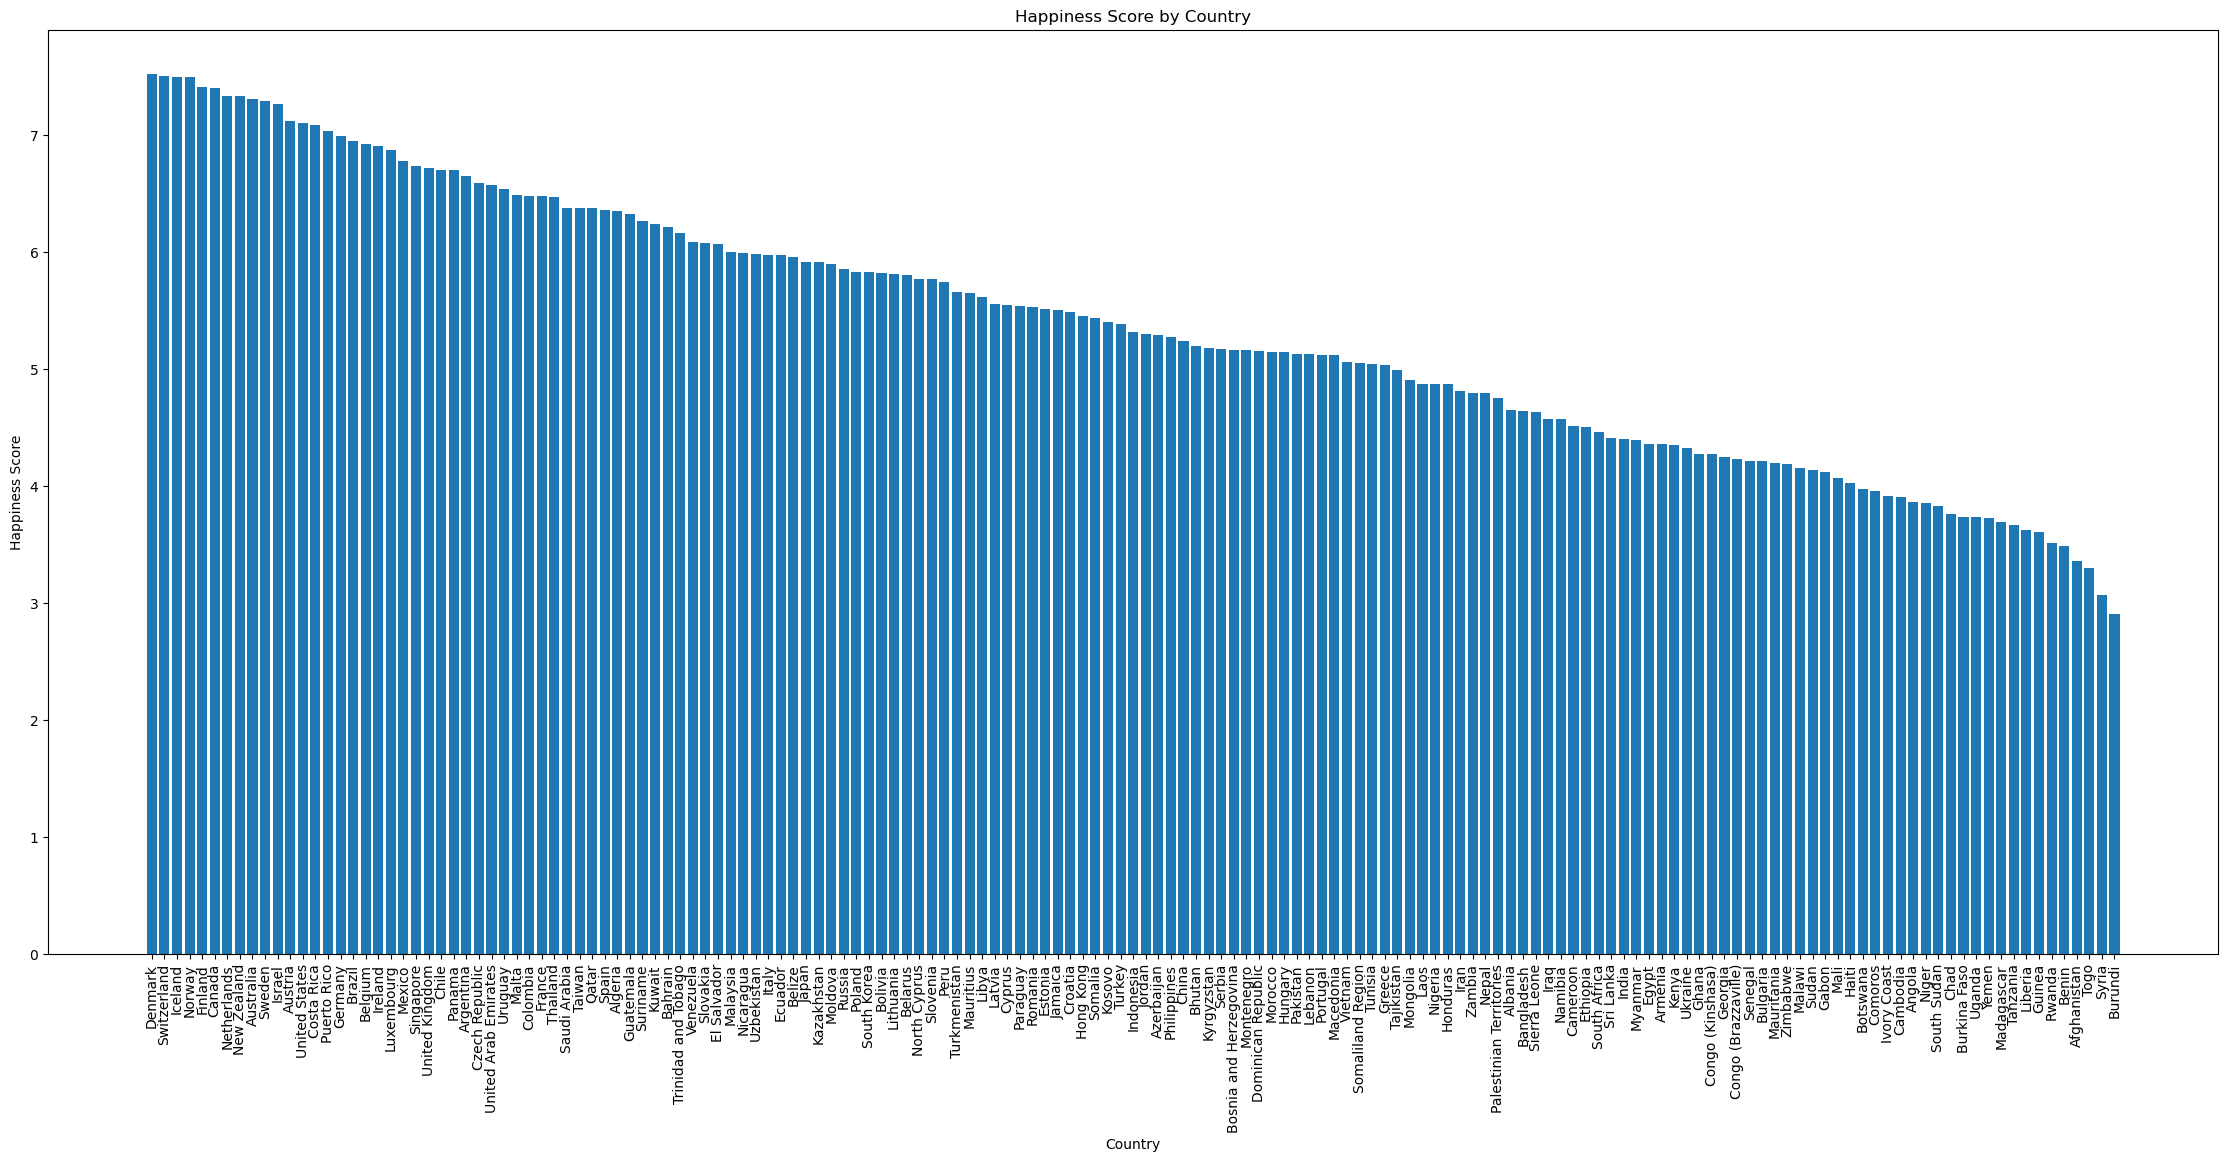

In [4]:
plt.figure(figsize=(28, 12))
plt.bar(df["Country"], df["Happiness Score"])
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Happiness Score by Country")
plt.xticks(rotation=90)
plt.show()

In [5]:
fig = px.bar(df, x="Country", y="Happiness Score")
fig.show()


 And then let's look at GDP per capita based on happiness rates

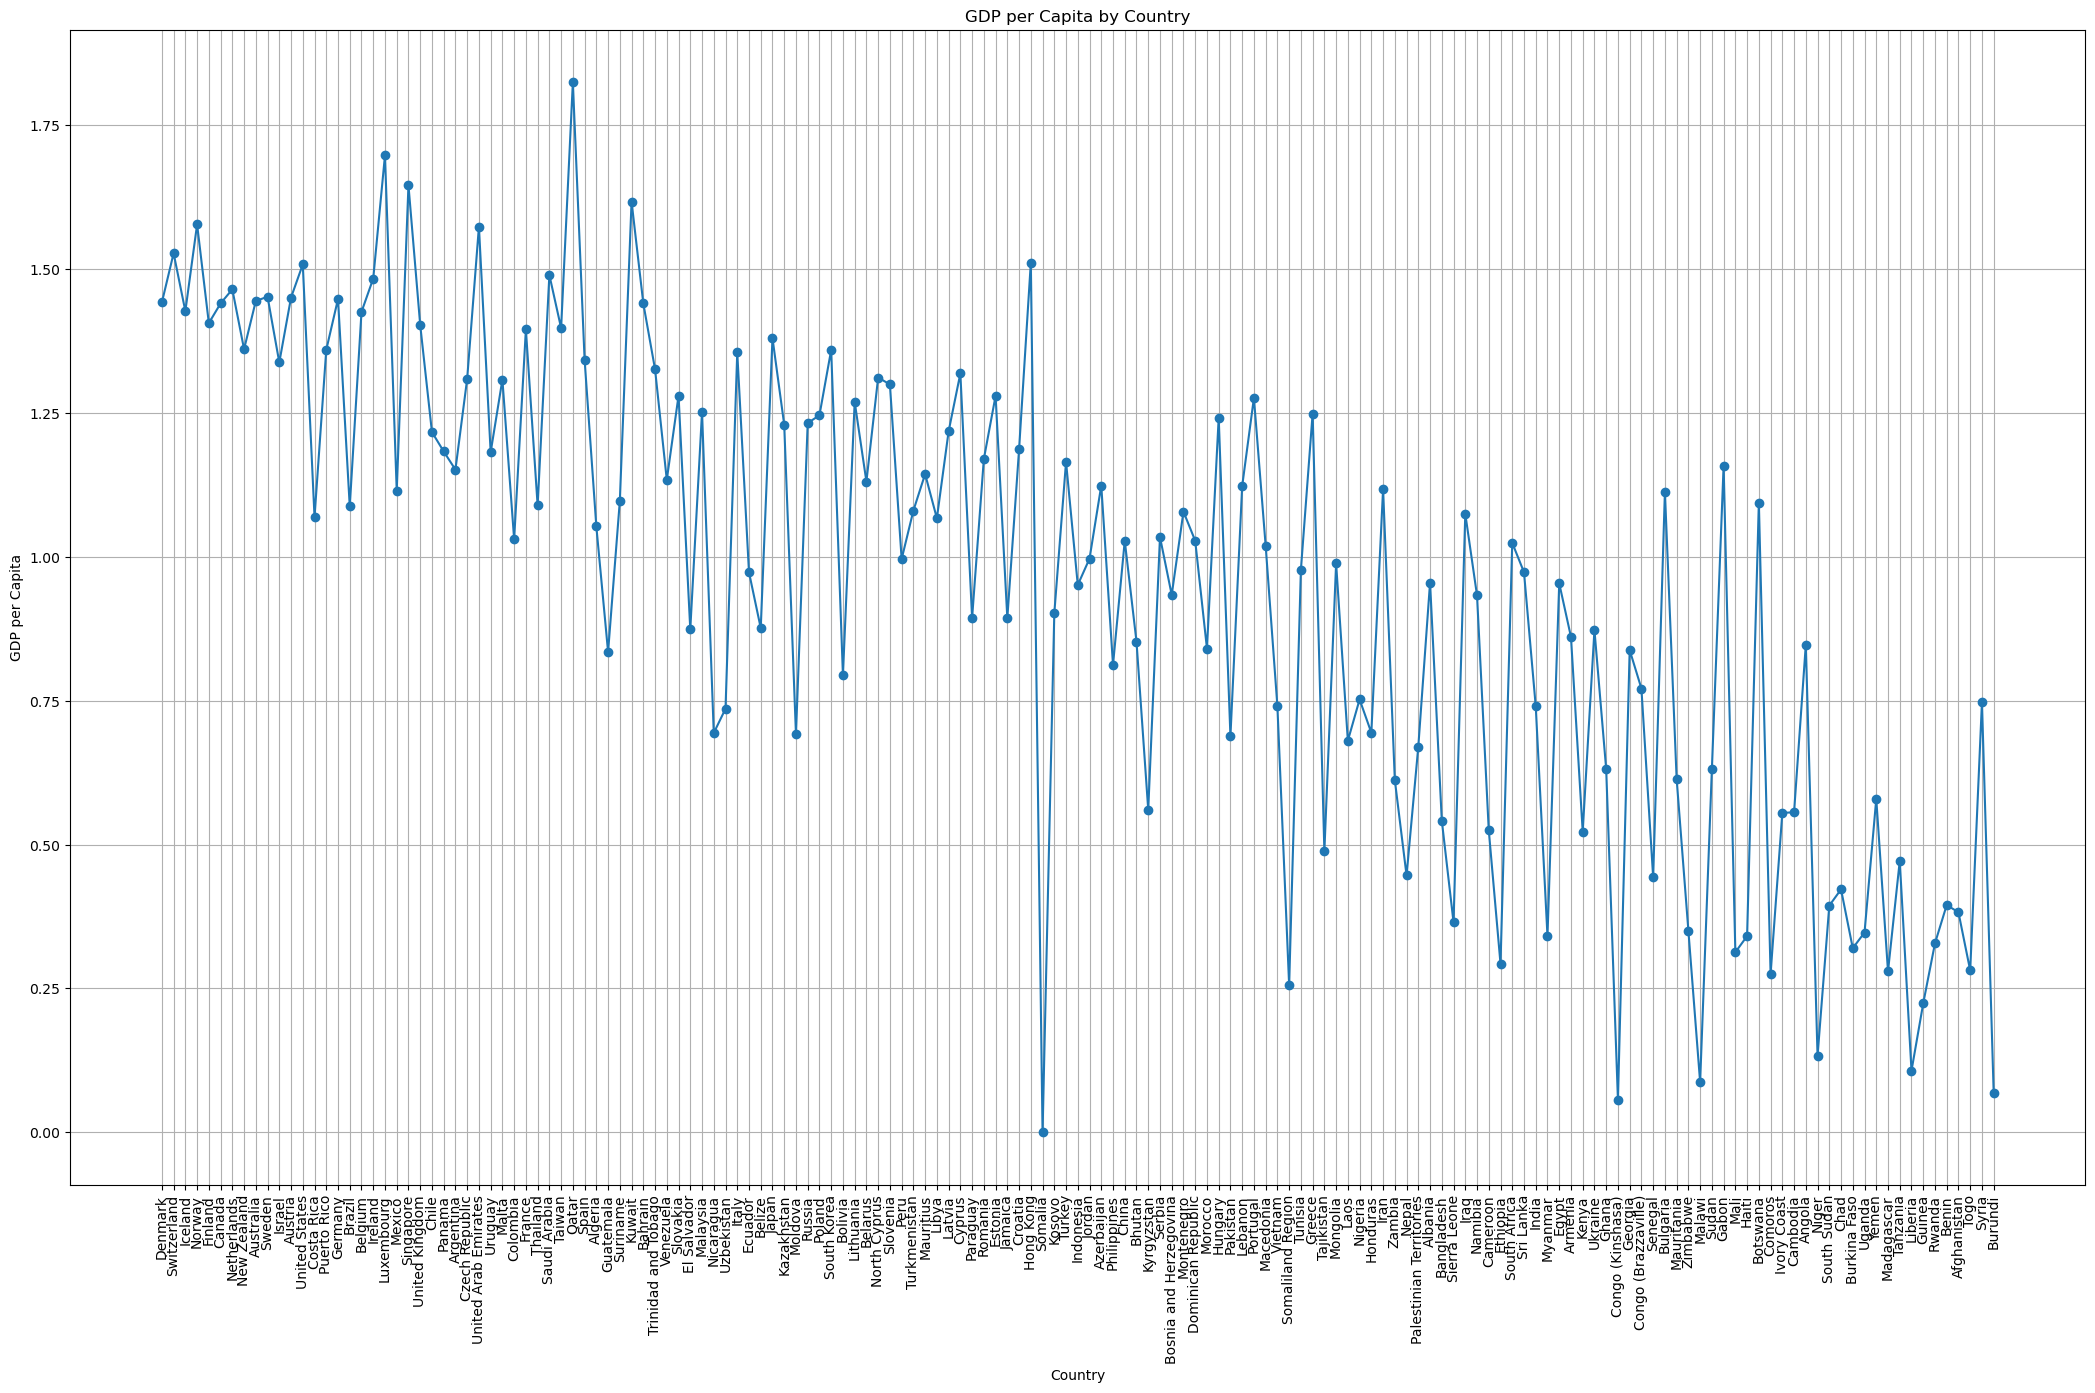

In [6]:
plt.figure(figsize=(26, 15))
plt.plot(df["Country"], df["Economy (GDP per Capita)"], marker='o')
plt.xlabel("Country")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita by Country")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


  Let's examine the scatter plot of countries happiness rates and their economies

In [7]:
fig = px.scatter(df, x="Economy (GDP per Capita)", y="Happiness Score", hover_data=["Country"])
fig.show()

The scatter plot illustrating the relationship between "Happiness Score" and "Economy (GDP per Capita)" shows us that there is a correlation between countries' happiness levels and their economic performance. Countries with higher happiness scores tend to exhibit higher economic performance.

# Regional Graphs

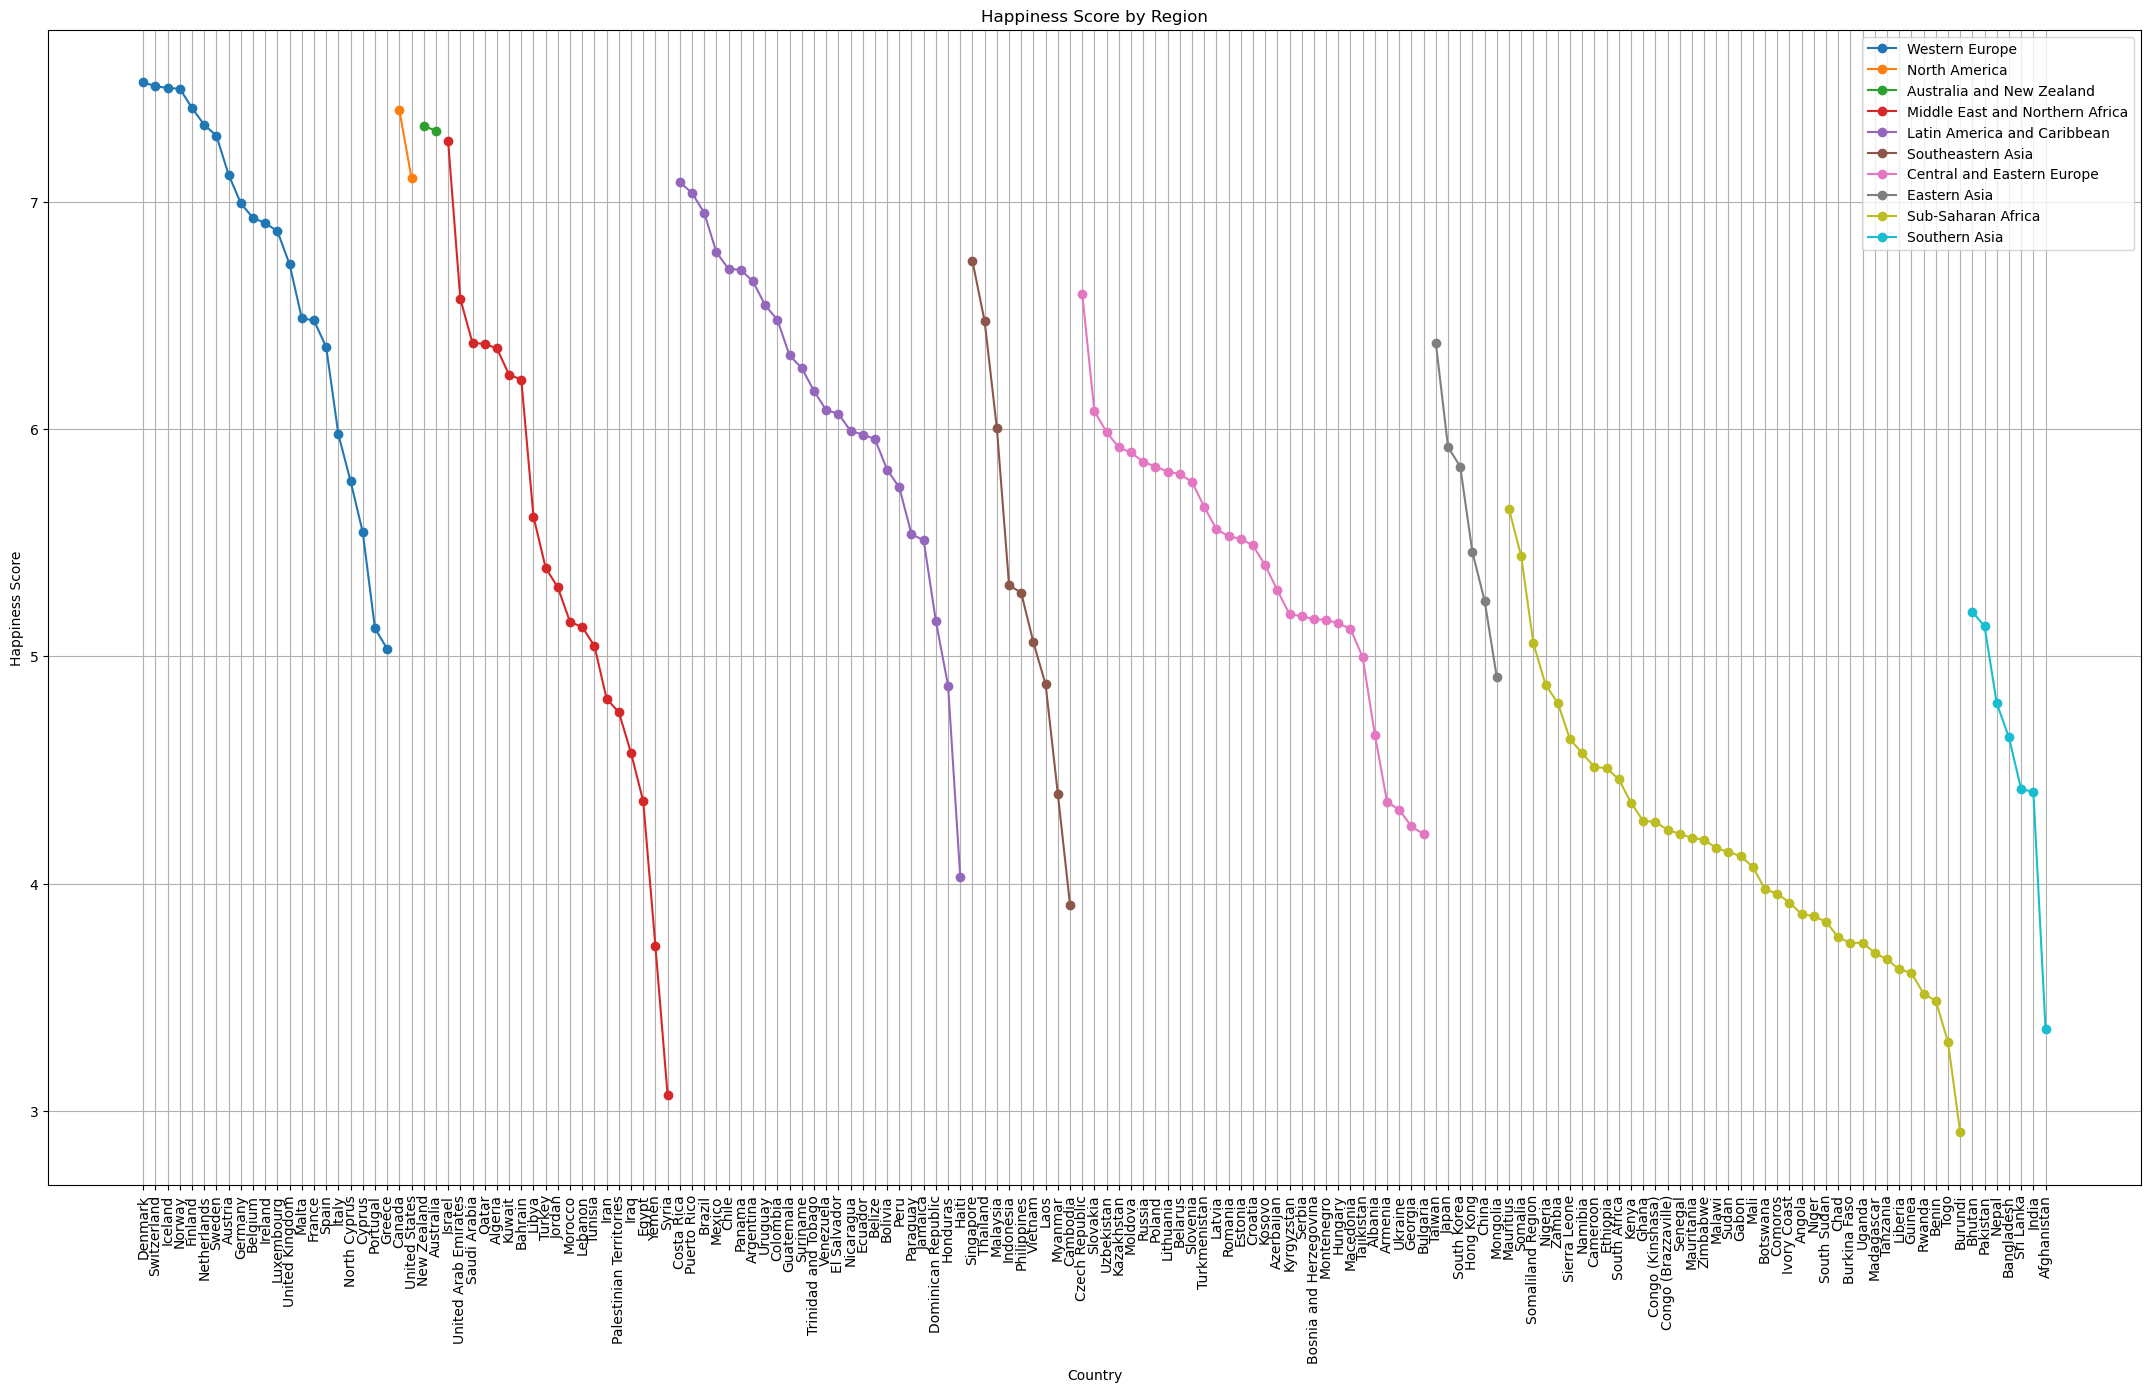

In [8]:
plt.figure(figsize=(27, 15))
regions = df["Region"].unique()
for region in regions:
    region_df = df[df["Region"] == region]
    plt.plot(region_df["Country"], region_df["Happiness Score"], marker='o', label=region)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Happiness Score by Region")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
fig = px.scatter(df, x="Family", y="Health (Life Expectancy)", color="Region", hover_data=["Country"])
fig.update_layout(title="Regional Scatter Plot of Health and Family", xaxis_title="Family", yaxis_title="Healt")
fig.show()


  Generally, regions with strong family ties tend to have higher levels of health.
  Strong family bonds can contribute to better overall health for individuals.
  While some regions exhibit a more pronounced relationship between family and health, others may show a weaker correlation.

In [10]:
fig = px.scatter(df, x="Freedom", y="Happiness Score", color="Region", hover_data=["Country"])
fig.update_layout(title="Scatter Plot of Freedom and Happiness Score by Region", xaxis_title="Freedom", yaxis_title="Happines")
fig.show()

Regions with a higher degree of freedom tend to have higher happiness scores.
The ability to make choices and lead a life with personal freedom can impact happiness levels.
While some regions show a strong correlation between freedom and happiness, others may exhibit a less pronounced relationship.

In [11]:
fig = px.scatter(df, x="Economy (GDP per Capita)", y="Dystopia Residual", color="Region", hover_data=["Country"])
fig.update_layout(title="Scatter Plot of GDP and Dystopia Residual by Region", xaxis_title="GDP", yaxis_title="Dystopia Residual")
fig.show()


Generally, regions with higher GDP values tend to have lower Dystopia Residual values.
Increased economic prosperity can lead to a reduction in negative dystopian factors and a more positive life experience.
While some regions show a strong negative correlation between GDP and Dystopia Residual, others may have a weaker relationship.

In [12]:
fig = px.box(df, x="Region", y="Happiness Score", color="Region")
fig.show()

In [13]:
fig = px.box(df, x="Region", y="Trust (Government Corruption)", color="Region")
fig.update_layout(title="Trust (Government Corruption)", xaxis_title="Region", yaxis_title="Trust (Government Corruption)")
fig.show()

fig = px.box(df, x="Region", y="Generosity", color="Region")
fig.update_layout(title="Generosity ", xaxis_title="Region", yaxis_title="Generosity")
fig.show()

In [14]:
fig = px.box(df, y="Dystopia Residual", color="Region")
fig.update_layout(title="Dystopia Residual ", xaxis_title="Region", yaxis_title="Dystopia Residual")
fig.show()

In [15]:
fig = px.histogram(df, x="Dystopia Residual", nbins=20, color="Region")
fig.update_layout(title="Dystopia Residual - Histogram", xaxis_title="Dystopia Residual", yaxis_title="Count")
fig.show()


"Dystopia Residual" column represents how "bad" or "dystopian" a country is, independent of the effects of other factors. To visualize how this value is distributed across different regions or countries, we can use visualizations such as a histogram graph

# Pairplot

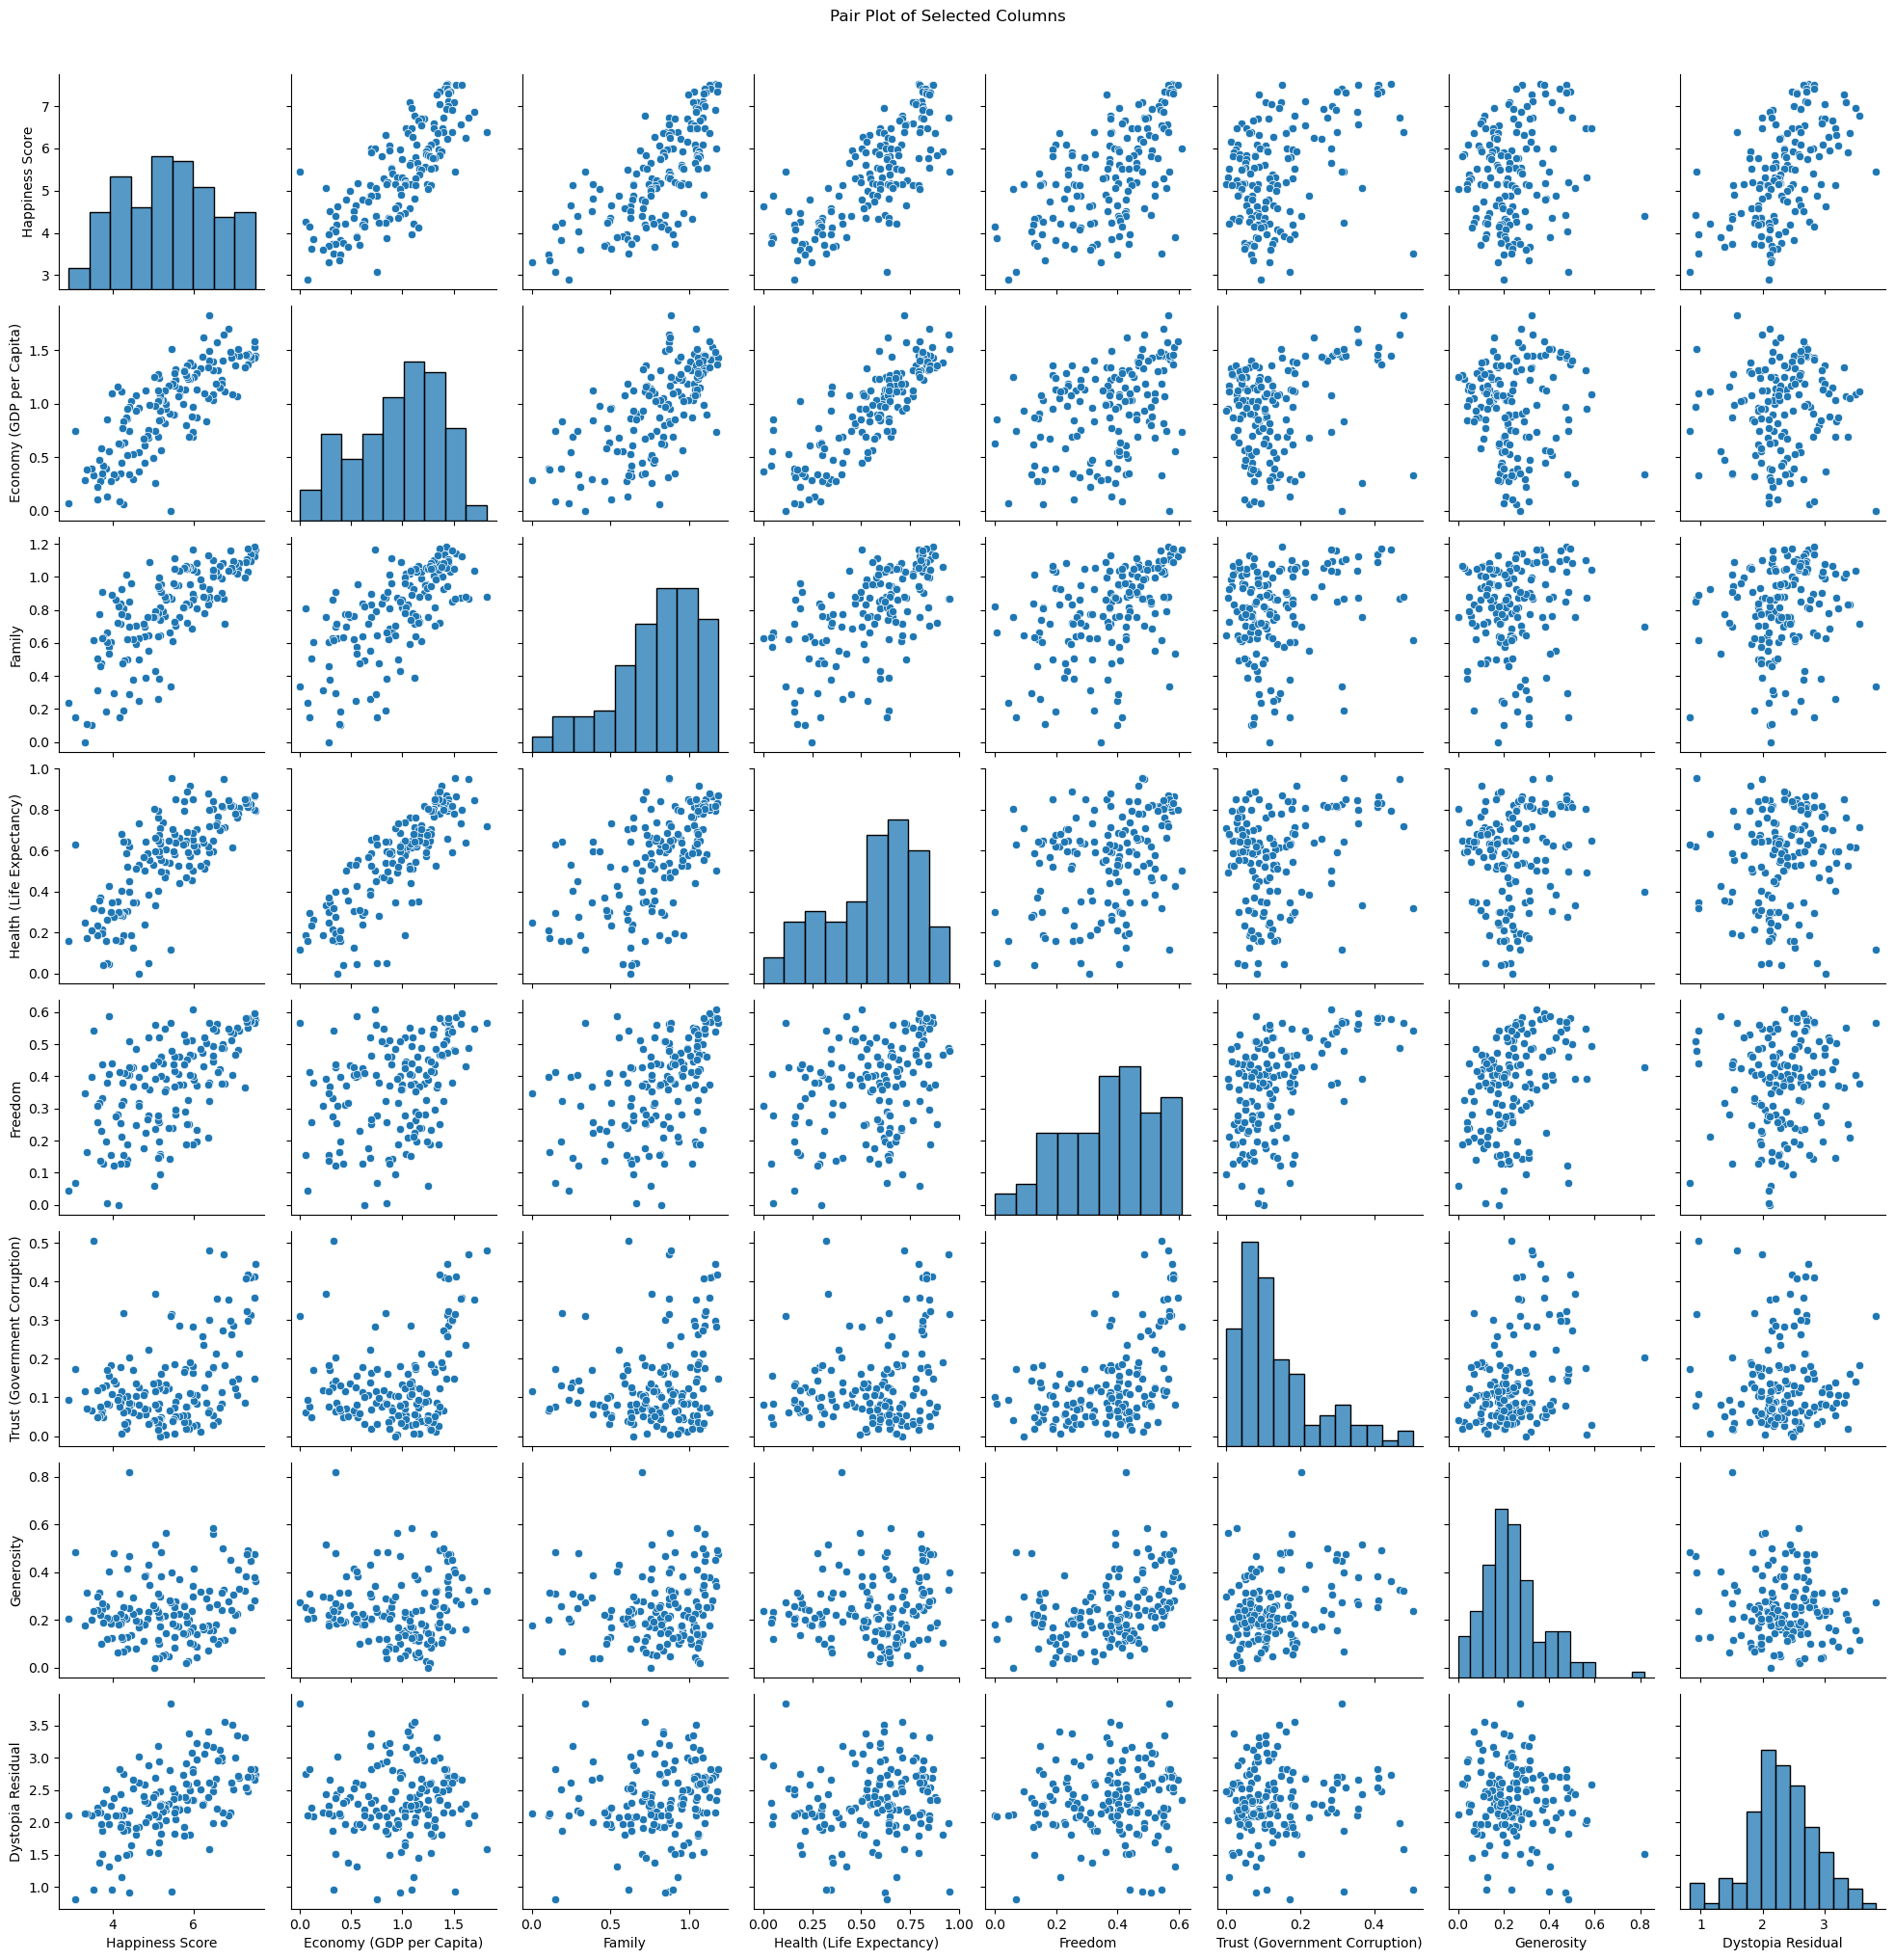

In [16]:
columns = ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
           "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]

sns.pairplot(df[columns])
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()

# Correlation

/tmp/ipykernel_20/3514356153.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



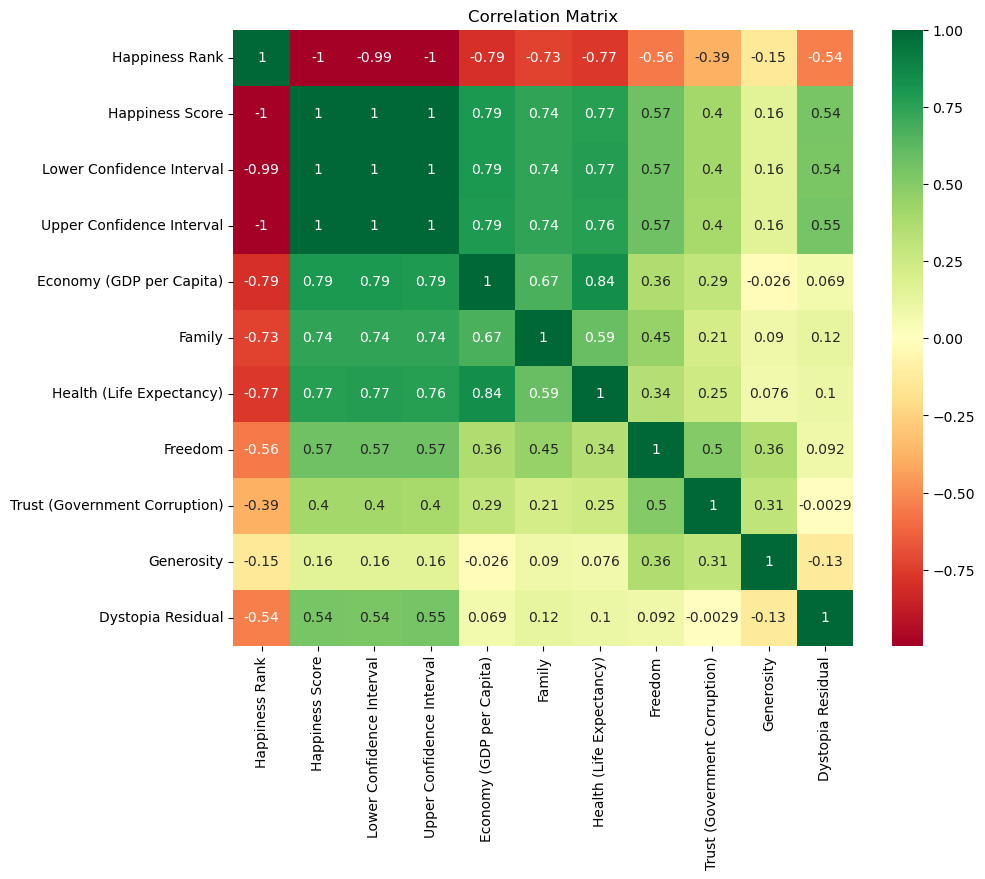

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix")
plt.show()

# Results

There is a relationship between Happiness Score and Economic Well-being (GDP). In general, people tend to be happier in countries where they are wealthier

There is a positive correlation between Health Status and Happiness Score. People are generally happier in countries where they have better health

There is a relationship between Freedom Level and Happiness Score. People are usually happier in countries where they have more freedom

There is a negative correlation between Perceived Government Corruption and Happiness Score. People are generally happier in countries where there is less corruption associated with the government

There is not a significant relationship between Generosity and Happiness Score. The impact of this factor on happiness may be less pronounced compared to other factors

In regional analyses, differences in happiness scores and other factors are observed among different regions. Each region may have varying levels of happiness and values in other factors




We hope that all countries will improve their level of well-being and become happier and more peaceful. By achieving economic development, social justice, access to healthcare, education, freedoms, and combating corruption on a global scale, we can work towards this goal. Global cooperation, sustainable development, and the protection of human rights play crucial roles in this process. With the efforts of individuals, societies, and governments, we can build a better world.

Thank you !